NB: This standalone script is implemented as a class in `pySIR.ipynb`.

Class `pySIR` is imported in `SIR_stochastic.ipynb`. 

### SIR model (deterministic case)

The SIR model is:

$\frac{dS}{dt}=-\frac{\beta}{N} IS$

$\frac {dI}{dt}=\frac{\beta}{N} IS-\gamma I$

$\frac {dR}{dt}=\gamma I$

The implementation is done using: $r_0 = \frac{\beta}{\gamma}$, $\gamma=1$

$\frac{dS}{dt}=-\frac {r_0}{N}SI$

$\frac{dI}{dt}=(\frac {r_0}{N}S-1)I$

$\frac {dR}{dt}= I$

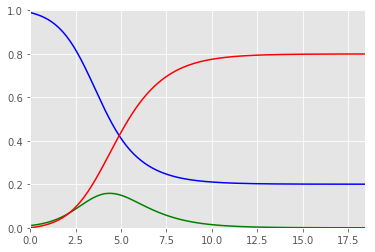

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
%matplotlib inline

# Functions
def set_global_variables(rep_number,total_pop):
    """ 
    Sets the following:
    - mean reproduction number r0
    - Total population N_pop
    """
    
    global r0
    global N_pop
    r0=rep_number
    N_pop = total_pop

def SIR_equations(t,y):
    """ Equations for SIR model """

    dSdt = - r0/N_pop *y[0]*y[1]    #dS(t)/dt
    dIdt = (r0/N_pop*y[0]-1.)*y[1]  #dI(t)/dt
    dRdt = y[1]                     #dR(t)/dt

    dydt = [dSdt, dIdt, dRdt ]
    
    return dydt

def get_t_lim(t,I):
    """
    Find max of the time-axis in the SIR plot:
    - time axis is cutoff when infected number drops below 0.01
    """
    t_lim = t_max
    i_t = -1
    while I[i_t]<1e-2: 
        t_lim = t[i_t]
        i_t = i_t-1
    return t_lim
        

# Main
if __name__ == "__main__":
    
    ### USER INPUT ################
    
    # Basic reproduction number
    r0 = 2.
    
    # Total population
    N_pop = 100
    
    # Infected number
    N_inf = 1
    
    # Time parameters
    t_min, t_max, N_t = [0,100,1000]
    
    ### END USER INPUT ############

    # Initialize parameters of the ODE system
    set_global_variables(r0,N_pop)
    
    # Initial conditions for Susceptibles, Infected, Recovered
    #      S(0),        I(0),  R(0)         
    y0 = [ N_pop-N_inf, N_inf, 0 ]
    
    # Time axis
    t = np.linspace(t_min,t_max,N_t)
    #y = [np.zeros(N_t),np.zeros(N_t),np.zeros(N_t)]

    # Get solution
    solve_SIR = solve_ivp(SIR_equations, [t_min,t_max], y0, t_eval=t)
    S,I,R = solve_SIR.y
    
    # Plot
    fig, ax = plt.subplots()

    t_lim = get_t_lim(t,I)
    plt.style.use('ggplot')
    ax.set_xlim(t_min,t_lim)
    ax.set_ylim(0,1)
    ax.plot(t,S/N_pop,'-',c='blue')
    ax.plot(t,I/N_pop,'-',c='green')
    ax.plot(t,R/N_pop,'-',c='red')
    plt.show()
